In [1]:
#importing dataset
import numpy as np
import pandas as pd 
bdata= pd.read_csv('D:/Datamining and machine learning/BeerBitternessData.csv',index_col='BeerID', encoding='latin1')
bdata.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,IBU,ABV,Color,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [2]:
bdata.shape

(73861, 22)

In [6]:
#checking for missing values
bdata1=bdata
bdata1.isnull().sum(axis = 0)

Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
IBU                  0
ABV                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

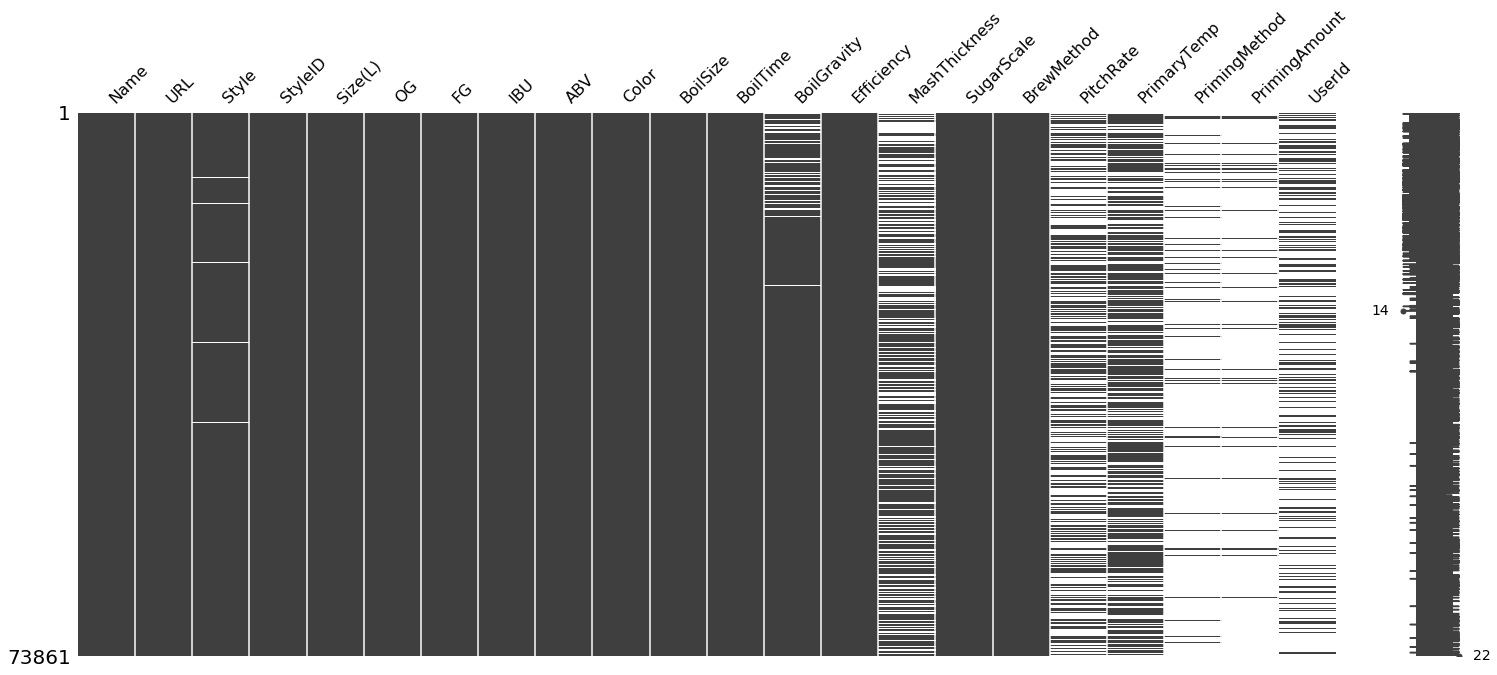

In [4]:
import matplotlib.pyplot as plt
import missingno as msno 
%matplotlib inline
msno.matrix(bdata)

In [8]:
#imputing missing values
bdata1.BoilGravity = bdata1.BoilGravity.fillna(bdata1.BoilGravity.mean())
bdata1.PitchRate = bdata1.PitchRate.fillna(bdata1.PitchRate.mean())
#bdata1.info()

In [9]:
bdata1.drop(['Name','Style','MashThickness','PrimaryTemp','PrimingMethod','PrimingAmount','UserId'],axis=1,inplace=True)
bdata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Data columns (total 15 columns):
URL            73861 non-null object
StyleID        73861 non-null int64
Size(L)        73861 non-null float64
OG             73861 non-null float64
FG             73861 non-null float64
IBU            73861 non-null float64
ABV            73861 non-null float64
Color          73861 non-null float64
BoilSize       73861 non-null float64
BoilTime       73861 non-null int64
BoilGravity    73861 non-null float64
Efficiency     73861 non-null float64
SugarScale     73861 non-null object
BrewMethod     73861 non-null object
PitchRate      73861 non-null float64
dtypes: float64(10), int64(2), object(3)
memory usage: 9.0+ MB


In [11]:
bdata2= bdata1[['IBU','ABV','BoilTime','Color','PitchRate']]
bdata2.head()

,IBU,ABV,BoilTime,Color,PitchRate
BeerID,,,,,
1,5.48,17.65,75,4.83,0.750468
2,8.16,60.65,60,15.64,0.750468
3,5.91,59.25,60,8.98,0.750468
4,5.80,54.48,60,8.50,0.750468
5,6.48,17.84,90,4.57,0.750468


In [36]:
bdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Data columns (total 5 columns):
IBU          73861 non-null float64
ABV          73861 non-null float64
BoilTime     73861 non-null int64
Color        73861 non-null float64
PitchRate    73861 non-null float64
dtypes: float64(4), int64(1)
memory usage: 3.4 MB


In [12]:
beer_corr = bdata2.corr()["IBU"]
beer_corr.abs().sort_values(ascending=False)[1:]

ABV          0.290889
Color        0.271332
BoilTime     0.120629
PitchRate    0.089161
Name: IBU, dtype: float64

In [13]:
bdata2.corr()

,IBU,ABV,BoilTime,Color,PitchRate
IBU,1.000000,0.290889,0.120629,0.271332,0.089161
ABV,0.290889,1.000000,0.078694,0.060283,0.004372
BoilTime,0.120629,0.078694,1.000000,0.058089,0.138103
Color,0.271332,0.060283,0.058089,1.000000,0.010953
PitchRate,0.089161,0.004372,0.138103,0.010953,1.000000


In [14]:
from sklearn.model_selection import train_test_split

x = bdata2[bdata2.loc[:, bdata2.columns != 'IBU'].columns] 
y = bdata2['IBU']

In [15]:
#spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [16]:
bdata2.shape

(73861, 5)

In [17]:
x_train.shape

(59088, 4)

In [18]:
x_test.shape

(14773, 4)

In [19]:
#KNN regression model
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(100)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn.score(x_test,y_test)

0.2878605790415236

In [20]:
#evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error :"+ metrics.mean_absolute_error(y_test,y_pred).astype(str))
print("Root Mean Squared Error :" + np.sqrt(metrics.mean_squared_error(y_test,y_pred)).astype(str))
print("R square :"+ r2_score(y_test,y_pred).astype(str))

Mean Absolute Error :0.9964185811954241
Root Mean Squared Error :1.503928659788251
R square :0.2878605790415236


In [21]:
#comparing RMSE vlaue of trianing and testing dataset
y_pred_x_train=knn.predict(x_train)
print("KNN Regression")
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,y_pred_x_train)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,y_pred)).astype(str))

KNN Regression
RMSE value of Training dataset:1.6445229713561111
RMSE value of testing dataset:1.503928659788251


In [22]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(knn, x_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())

0.23792320253509133


In [23]:
#Applying Kfold validation technique
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10, random_state=2)
results_kfold = cross_val_score(knn, x_train, y_train, cv=kfold)
print("Kfold validation")
print("R-square: " +results_kfold.mean().astype(str)) 

Kfold validation
R-square: 0.24264986338732353


In [40]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,7))
# plt.scatter(y_test,x_test.iloc[:,2],color="Red")
# plt.title("Actual vs Predicted",size=15,pad=10)
# #plt.xlabel('Rating',size = 15)
# #plt.ylabel('Frequency',size = 15)
# plt.scatter(y_pred,x_test.iloc[:,2],color="green")

In [30]:
#applying gradient boosting regression method
from sklearn.ensemble import GradientBoostingRegressor
model1 = GradientBoostingRegressor(n_estimators=3,learning_rate=1)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
model1.score(x_test,y_test)

0.26300239704471107

In [31]:
#evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error :"+ metrics.mean_absolute_error(y_test,y_pred).astype(str))
print("Root Mean Squared Error :" + np.sqrt(metrics.mean_squared_error(y_test,y_pred)).astype(str))
print("R square :"+ r2_score(y_test,y_pred).astype(str))

Mean Absolute Error :1.0220109371509487
Root Mean Squared Error :1.5299518380771284
R square :0.26300239704471107


In [34]:
#Comparing RMSE value of trianing and testing set
y_pred_x_train=model1.predict(x_train)
print("Gradient Boosting Regression")
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,y_pred_x_train)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,y_pred)).astype(str))

Gradient Boosting Regression
RMSE value of Training dataset:1.6526359432084858
RMSE value of testing dataset:1.5299518380771284


In [32]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(model1, x_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())

0.20759089123579344


In [33]:
#applying Kfold technique
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10, random_state=2)
results_kfold = cross_val_score(model1, x_train, y_train, cv=kfold)
print("Kfold Validaition")
print("R-square: " + results_kfold.mean().astype(str)) 

Kfold Validaition
R-square: 0.21830712808957956


In [42]:
#applying multiple linear regression 
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)
y_pred=mlr.predict(x_test)
mlr.score(x_test,y_test)

0.17769418657321756

In [44]:
#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error :"+ metrics.mean_absolute_error(y_test,y_pred).astype(str))
print("Root Mean Squared Error :" + np.sqrt(metrics.mean_squared_error(y_test,y_pred)).astype(str))
print("R square :"+ r2_score(y_test,y_pred).astype(str))

Mean Absolute Error :1.0795353366502194
Root Mean Squared Error :1.6219221762484943
R square :0.1717325781071315


In [45]:
#applying K-fold validation technique
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10, random_state=2)
results_kfold = cross_val_score(model1, x_train, y_train, cv=kfold)
print("Kfold Validaition")
print("R-square: " + results_kfold.mean().astype(str)) 

Kfold Validaition
R-square: 0.21830712808957958
